In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json

In [15]:
f = open('data/train.json', 'r')
raw_data = json.load(f)
#print(raw_data[0]['is_iceberg'])
#print(raw_data[0]['band_1'])

1


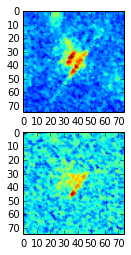

In [14]:
id = 1501
test_image1 = np.array(raw_data[id]['band_1'])
test_image2 = np.array(raw_data[id]['band_2'])
test_image1 = test_image1.reshape((75,75))
test_image2 = test_image2.reshape((75,75))
print(raw_data[id]['is_iceberg'])

plt.subplot(211)
plt.imshow(test_image1)
plt.subplot(212)
plt.imshow(test_image2)



In [16]:
s = np.stack([test_image1, test_image2])
print(s)

[[[-23.322561 -23.122875 -23.322632 ..., -21.510609 -23.53121  -26.453846]
  [-23.122875 -23.950802 -25.362494 ..., -21.844795 -22.741112 -23.740665]
  [-22.367176 -22.012672 -25.362494 ..., -21.844866 -22.741112 -25.114983]
  ..., 
  [-21.509377 -23.325596 -22.93079  ..., -24.403498 -23.958042 -21.03548 ]
  [-20.008083 -22.191046 -24.868988 ..., -24.403498 -25.628963 -22.374489]
  [-20.726406 -23.32567  -28.390886 ..., -25.117882 -26.751354 -26.751354]]

 [[-26.449505 -27.048769 -26.164768 ..., -23.326757 -24.632164 -27.368994]
  [-27.692461 -27.364727 -26.164839 ..., -24.174904 -24.87022  -24.400671]
  [-28.387775 -29.14362  -26.164839 ..., -27.053108 -24.87022  -24.870293]
  ..., 
  [-21.674826 -24.630932 -25.892038 ..., -25.628891 -24.635208 -26.456816]
  [-23.739216 -22.191046 -22.739883 ..., -25.117807 -23.743565 -24.403645]
  [-21.843563 -21.674973 -24.173817 ..., -23.534256 -23.743637 -23.743637]]]


In [19]:
s = [1,3,4,5]
b = [3,4,5,6]
p = zip(s,b)
print(p)

[(1, 3), (3, 4), (4, 5), (5, 6)]


In [22]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F


class CNNet(nn.Module):

    def __init__(self):
        super(CNNet, self).__init__()
        self.conv1_1 = nn.Conv2d(in_channels=2, out_channels=64, kernel_size=5)
        self.conv1_2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        self.conv1_3 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=1)
        self.pool_1 = nn.MaxPool2d(kernel_size=2,stride=2)
        # conv3_2 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3)
        self.bn1 = nn.BatchNorm2d(num_features=256)

        self.conv2_1 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3)
        self.conv2_1 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3)
        self.pool_2 = nn.MaxPool2d(kernel_size=2,stride=2)

        self.conv3_1 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=1)
        self.conv3_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3)
        self.pool_3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc_1 = nn.Linear(10000, 512)
        self.fc_2 = nn.Linear(512, 64)
        self.out = nn.Linear(64, 2)

    def forward(self, x):

        x = F.leaky_relu(self.conv1_1(x), negative_slope=0.5)
        x = F.leaky_relu(self.conv1_2(x), negative_slope=0.5)
        x = F.leaky_relu(self.conv1_3(x), negative_slope=0.5)
        x = self.pool_1(x)
        print(x.size())
        x = F.leaky_relu(self.conv2_1(x), negative_slope=0.5)
        x = F.leaky_relu(self.conv2_1(x), negative_slope=0.5)
        x = self.pool_2(x)
        print(x.size())
        x = F.leaky_relu(self.conv3_1(x), negative_slope=0.5)
        x = F.leaky_relu(self.conv3_2(x), negative_slope=0.5)
        x = self.pool_3(x)

        print(x.size())

In [23]:
from data import data_process as dp

In [24]:
train_data, test_data = dp.load_train_data('data')

In [25]:
print(train_data[0])

(array([[[-27.495087, -25.556927, -25.27216 , ..., -22.432693, -21.846951,
         -21.477322],
        [-24.217951, -25.556927, -24.996395, ..., -23.738071, -21.477322,
         -21.477322],
        [-20.613834, -22.634369, -23.973347, ..., -26.474831, -23.280857,
         -22.432821],
        ..., 
        [-21.475527, -21.475571, -23.504765, ..., -25.000111, -24.22179 ,
         -22.638206],
        [-23.974304, -20.136635, -22.036186, ..., -20.951748, -22.847515,
         -21.848078],
        [-26.47312 , -23.736403, -23.736403, ..., -20.617634, -24.732914,
         -27.499008]],

       [[-32.17675 , -32.176792, -29.993944, ..., -31.019665, -29.996655,
         -28.253693],
        [-32.17675 , -32.176792, -31.577568, ..., -29.527035, -32.179588,
         -28.253693],
        [-32.176792, -31.577528, -29.078793, ..., -27.497881, -27.867592,
         -31.019791],
        ..., 
        [-28.2519  , -31.578569, -29.079838, ..., -29.528036, -27.498924,
         -30.494213],
        [

In [26]:
model = CNNet()

In [7]:
image = train_data[0][0]

In [8]:
print(image.shape)

(2, 75, 75)


In [9]:
input_image = Variable(torch.FloatTensor(image))

In [13]:
print(input_image.size())

torch.Size([2, 75, 75])


In [15]:
input_image = input_image.unsqueeze(0)

In [27]:
model(input_image)

torch.Size([1, 256, 34, 34])


RuntimeError: Need input of dimension 4 and input.size[1] == 512 but got input to be of shape: [1 x 256 x 34 x 34] at /Users/soumith/code/builder/wheel/pytorch-src/torch/lib/THNN/generic/SpatialConvolutionMM.c:47